In [1]:
import cv2 as cv
from IPython.display import display, Image
import matplotlib.pyplot as plt

No of face(s) detected = 0
No of face(s) detected = 1
No of face(s) detected = 0
No of face(s) detected = 1


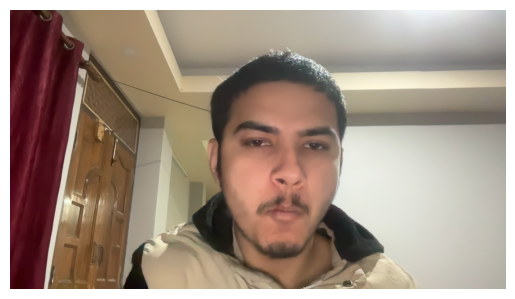

In [5]:
cap = cv.VideoCapture(0)  # Open webcam

if not cap.isOpened():
    print("Error!!! Could not open camera")
else:
    prev_face_count = -1
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error!!! Could not read frame.")
            break    

        #cv.imshow("Grayscale Video", frame)
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # Press 'q' to exit
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

        haar_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
        face_box = haar_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 10)

        face_count = len(face_box)
        
        if face_count != prev_face_count:
            print(f'No of face(s) detected = {face_count}')
            prev_face_count = face_count 
        
        for (x,y,w,h) in face_box:
            cv.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), thickness = 2)
        
        cv.imshow('Detected face', frame)

cap.release()
cv.destroyAllWindows()
cv.waitKey(1)

plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()